Sampling Error

For every statistical question we want to answer, we should try to use the population. In practice, that's not always possible because the populations of interest usually vary from large to extremely large. Also, getting data is generally not an easy task, so small populations often pose problems too.

These problems can be solved by sampling from the population that interests us. Although not as good as working with the entire population, working with a sample is the next best thing we can do.



In [3]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')

 - Get familiar with the data set.
 - Print the first five rows using DataFrame.head() and the last five rows with DataFrame.tail().
 - Find the number of rows and columns using DataFrame.shape.
 - Learn about each column from the [documentation](https://www.kaggle.com/jinxbe/wnba-player-stats-2017). You can also find useful documentation in this [glossary](https://www.basketball-reference.com/about/glossary.html) and on WNBA's official [page](http://www.wnba.com/stats/player-stats/).

In [4]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [6]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [7]:
wnba.shape

(143, 32)

- Take one measure of the sampling error.
 - Use the Games Played column to find the maximum number of games played by a player in the season 2016-2017. The data set contains all the players that had at least one game, so it's a population relative to our question. Find this parameter, and assign the result to a variable named parameter.
 - Using the Series.sample() method, sample randomly 30 players from the population, and assign the result to a variable named sample.
 - When calling Series.sample(), use the the argument random_state = 1. This makes your results reproducible and helps us with the answer checking (we'll discuss more about this in the next screen).
 - Find the maximum number of games using the sample, and assign the result to a variable named statistic.
 - Measure the sampling error, and assign the result to a variable named sampling_error.

In [8]:

parameter = wnba['Games Played'].max()
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = sample.max()
sampling_error = parameter - statistic
print(parameter)
print(sampling_error)

32
2


Simple Random Sampling

When we sample we want to minimize the sampling error as much as possible. We want our sample to mirror the population as closely as possible.

In our previous exercise, we used Series.sample() to sample. This method performs simple random sampling by generating an array of random numbers, and then using those numbers to select values from a Series at the indices corresponding to those random numbers. The method can be also extended for DataFrame objects, where random rows or columns can be sampled.

When we use the random_state parameter, like we did in the previous exercise with Series.sample(30, random_state = 1), we make the generation of random numbers predictable. This is because Series.sample() uses a pseudorandom number generator under the hood. A pseudorandom number generator uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With random_state we specify that initial value used by the pseudorandom number generator.

If we want to generate a sequence of five numbers using a pseudorandom generator, and begin from an initial value of 1, we'll get the same five numbers no matter how many times we run the code. If we ran wnba['Games Played'].sample(5, random_state = 1) we'd get the same sample every time we run the code.

Pseudorandom number generators are of great use in scientific research where reproducible work is necessary.

Let's visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling.
 - Using simple random sampling, take 100 samples from our WNBA data set, and for each sample measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop:
 - Sample 10 values from the PTS column.
 - Compute the mean of this sample made of 10 values from the PTS column, and append the result to a list.
 - To make your results reproducible, vary the random_state parameter of the sample() method with values between 0 and 99. For the first iteration of the for loop, random_state should equal 0, for the second iteration should equal 1, for the third should equal 2, and so on.
 - Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.

Using plt.scatter(), display all the 100 sample means using a scatter plot. For the x-axis, use integers from 1 to 100 to designate the sample number. Use the y-axis for the sample means.

Using plt.axhline(), draw a horizontal line that represents the average number of points in the population.

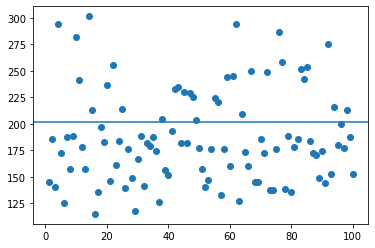

In [9]:
import matplotlib.pyplot as plt

wnba = pd.read_csv('wnba.csv')
sample_means = []
population_mean = wnba['PTS'].mean()

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)

Stratified sampling

Perform stratified sampling: 

 - stratify the data set by player position, and then do simple random sampling on every stratum. At the end, use the sample to find which position has the greatest number of points per game.
 - Create a new column which describes the number of points a player scored per game during the season. The number of total points a player scored the entire season is stored in the PTS column, and the number of games played in the Games Played column. Give the new column a relevant name.
 - Stratify the wnba data set by player position. The Pos column describes a player's position on the field. Assign each stratum to a different variable.
 - Loop through the strata, and for each stratum:
 - Sample 10 observations using simple random sampling (set random_state = 0).
 - Find the mean points per game using the sample. Use the new column you've created earlier.
 - Find a way to store the mean along with its corresponding position. You can use a dictionary.
 - Find the position that has the greatest number of points per game, and assign its name to a variable named position_most_points.

To find the dictionary key that has the greatest dictionary value, you can use this [technique](https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary#280156).

In [11]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sapling on each stratum
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)
print(position_most_points)

C


Proportional Stratified Sampling

Perform stratified sampling on the data set 100 times, and sample strata proportionally.

 - Stratify the data set by the number of games played in the following way: the first strata should be composed of players that played 12 games or less; the second of players that played more than 12 games, but up to 22 (included); and the third of players that played more than 22 games (22 not included).
 - Perform stratified sampling 100 times. For each of the 100 iterations of a for loop:
 - Sample each stratum proportionally. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum.
 - random_state should vary from 0 to 99: 0 for the first iteration, 99 for the last iteration.

 - Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use pd.concat().
 - Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.

Display the entire sampling process.
 - Using plt.scatter(), display the sampling means on a scatter plot. Place the means on the y-axis, and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).
 - Using plt.axhline(), display the population mean for the total points in the form of a horizontal line.

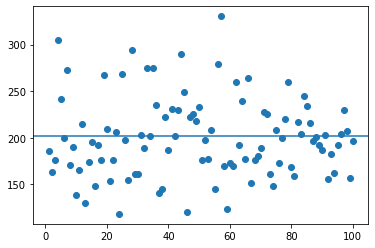

In [12]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

The poor performance is caused by a bad choice of strata. We stratified the data by the number of games played, but this isn't a good approach. A player is considered as having played one game even if she only played for one or two minutes. But others play 30 or 40 minutes, and they're still considered as having played one game.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

Here are a few guidelines for choosing good strata:

#### 1. Minimize the variability within each stratum.

For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need a more granular stratification (need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

#### 2. Maximize the variability between strata.

Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or to change the stratification criterion. In the previous screen, stratifying the data by games played resulted in strata that weren't too different from each other with respect to the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

#### 3. The stratification criterion should be strongly correlated with the property you're trying to measure.

For instance, the column describing minutes played (the criterion) should be strongly correlated with the number of total points (property we want to measure). We've covered briefly the concept of correlation in the pandas courses, and we'll cover it again later in these statistics courses, so don't worry if the concept of correlation doesn't make much sense to you now.

In [13]:
wnba['MIN'].value_counts(bins = 3, normalize = True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64

Cluster sampling

One way is to list all the data sources you can find, and then randomly pick only a few of them to collect data from. Then you can sample individually each of the sources you've randomly picked. This sampling method is called cluster sampling, and each of the individual data sources is called a cluster.

Let's simulate a cluster sampling on our data set.
 - Pick four team clusters randomly using the technique we've learned (use random_state = 0).
 - Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.
 - Use the data collected to estimate the mean for the following player attributes:
 - Height;
 - Age;
 - BMI;
 - Total points.
 
Finally, measure the sampling error of your estimates, and assign the errors to the following variables: sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points.

In [15]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

print(sampling_error_height)
print(sampling_error_age)
print(sampling_error_BMI)
print(sampling_error_points)

-0.06400121617511445
-1.401337792642142
0.23095444165950596
-27.79674673152934


In [17]:
# Nominal Scale
nominal_scale = sorted(['Name', 'Team', 'Pos', 'Birth_Place', 'College'])
print(nominal_scale)

['Birth_Place', 'College', 'Name', 'Pos', 'Team']


In [18]:
# Ordinal Scale



Interval or Ratio Scale

Examine the various variables of the data set, and find the ones that are measured on an interval or ratio scale.
For the variables measured on a interval scale, add their names as a string to a list named interval. Sort the list alphabetically.
For the variables measured on a ratio scale, add their names as a string to a list named ratio. Sort the list alphabetically.
We've also added the Weight_deviation variable to the dataset, so make sure you include that one too in one of the lists.

In [19]:
interval = ['Birthdate', 'Weight_deviation']
ratio = sorted(['Height', 'Weight', 'BMI', 'Age', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '15:00', 
                '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO',
                'PTS', 'DD2', 'TD3'])

Real Limits

In [20]:
bmi = {21.201: [21.2005, 21.2015],
 21.329: [21.3285, 21.3295],
 23.875: [23.8745, 23.8755],
 24.543: [24.5425, 24.5435],
 25.469: [25.4685, 25.4695]}